<a href="https://colab.research.google.com/github/Eric-Mendes/conta-stone-data-challenge/blob/main/data_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src='https://seeklogo.com/images/S/stone-pagamentos-logo-781DFFF629-seeklogo.com.png'/> 



Este notebook foi criado para responder às perguntas do [Conta Stone's Data Intern Challenge](https://gist.github.com/caiotaniguchi/8b5ee7dc75c8b6426222942ced90c4c1#file-dataset-customers-csv-L2469).

**Respostas:**


*   [What is the average age of the customers in the database?](https://colab.research.google.com/github/Eric-Mendes/conta-stone-data-challenge/blob/main/data_analyses.ipynb#scrollTo=EcU_VrIx1kih&line=2&uniqifier=1)
*   Item da lista



In [1]:
# Import das bibliotecas mais usadas em ciência de dados
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Criando DataFrames para cada dataset disponibilizado
card_url = "https://gist.githubusercontent.com/caiotaniguchi/\
8b5ee7dc75c8b6426222942ced90c4c1/raw/39ca0f8b442068aaffed35e26f0ce7f76faf1c63/\
dataset-cards.csv"

customers_url = "https://gist.githubusercontent.com/caiotaniguchi/\
8b5ee7dc75c8b6426222942ced90c4c1/raw/39ca0f8b442068aaffed35e26f0ce7f76faf1c63/\
dataset-customers.csv"

fraud_url = "https://gist.githubusercontent.com/caiotaniguchi/\
8b5ee7dc75c8b6426222942ced90c4c1/raw/39ca0f8b442068aaffed35e26f0ce7f76faf1c63\
/dataset-frauds.csv"

transactions_url = "https://gist.githubusercontent.com/caiotaniguchi/\
8b5ee7dc75c8b6426222942ced90c4c1/raw/39ca0f8b442068aaffed35e26f0ce7f76faf1c63/\
dataset-transactions.csv"


df_card = pd.read_csv(card_url, sep=';')

df_customers = pd.read_csv(customers_url, sep=';')

df_fraud = pd.read_csv(fraud_url, sep=';')

df_transactions = pd.read_csv(transactions_url, sep=';')



---



**Questões**



1.   *Extract and analyze the data in order to answer the following questions. Provide a description and/or comments for each solution.*



- What is the average age of the customers in the database?

In [3]:
# pegando a coluna age (idade)
age = df_customers['age']

# pegando a média de idades
avg_age = age.mean()

# printando a idade média arredondada com duas casas depois da vírgula
print("The average age of the customers in the database is {} years old. \
(Approximately {} years and {} days old.)"\
      .format(round(avg_age, 2), round(avg_age), round((avg_age-int(avg_age))*365)))

The average age of the customers in the database is 35.06 years old. (Approximately 35 years and 22 days old.)




---



- How is the card_family ranked based on the credit_limit given to each card?

Inicialmente pensei em olhar para a média de limite de crédito, entretanto olhei primeiro para a quantidade de cada card_family no dataset, pois uma pequena quantidade de uma determinada card_family poderia acarretar uma grande média de credit_limit, o que enviesaria a análise. Além disso, há também o fator que a média é mais suscetível a outliers, por isso também analisei a variância pra cada card family.

In [4]:
# Pegando todas as distintas card_families no dataset
card_families = np.unique(df_card['card_family'])

# Pegando a quantidade de cada card_family no dataset
family_quantity = [(family, df_card['card_family'].loc\
                    [df_card.card_family == family]\
                   .count()) for family in card_families]

"""
Ordenando family_quantity na ordem decrescente, baseado na quantidade daquela
card_family
"""
family_quantity.sort(key=lambda qty: qty[1], reverse=True)

# Separando a card_family de sua quantidade
family_quantity = zip(*family_quantity)
family_quantity = list(family_quantity)

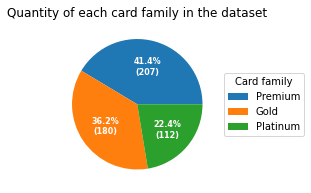

In [5]:
"""
Plotando um gráfico de setores com os resultados 
sobre as quantidades de card_family
"""

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = family_quantity[1]
card_families = family_quantity[0]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, card_families,
          title="Card family",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Quantity of each card family in the dataset")

plt.show()

Plotando um gráfico de barras para visualizar a média de limite de crédito (credit_limit) para cada card_family

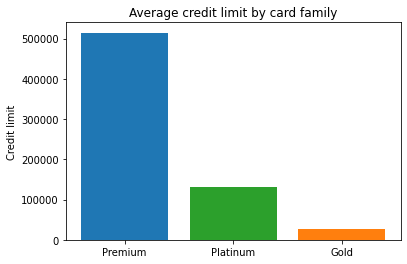

In [6]:
# Pegando a média de credit_limit para cada card_family
avg_credit_limit = [(family, np.array(df_card['credit_limit'].loc\
                                      [df_card.card_family == family]).mean())\
                     for family in card_families]

# Ordenando avg_credit_limit em ordem descrescente pela média daquela card_family
avg_credit_limit.sort(key=lambda family_credit_limit: family_credit_limit[1], \
                      reverse=True)

# Separando a card_family de sua média
avg_credit_limit = zip(*avg_credit_limit)
avg_credit_limit = list(avg_credit_limit)

# Plotando o gráfico
plt.bar(avg_credit_limit[0], avg_credit_limit[1], color=['tab:blue', 'tab:green', 'tab:orange'])
plt.title("Average credit limit by card family")
plt.ylabel("Credit limit")
plt.show()

Como vimos, a quantidade de cada card_family é diferente e média é bem discrepante entre cada card_family porque os dados não estão normalizados.

*Eis uma melhor visualização de como credit limit está rankeado de acordo com card family.*

Plotei o credit_limit de todos os cartões (com as mesmas cores dos gráficos acima).

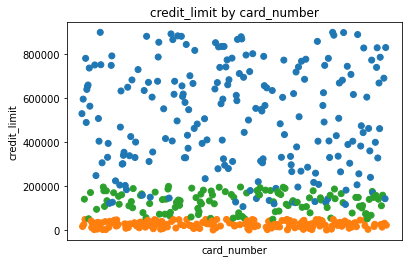

In [7]:
x = df_card['card_number']
y = df_card['credit_limit']
z = df_card['card_family']

colors = []
for card in z:
  if card == 'Premium':
    colors.append('tab:blue')
  elif card == 'Platinum':
    colors.append('tab:green')
  elif card == 'Gold':
    colors.append('tab:orange')

plt.scatter(x, y, color=colors)
plt.ylabel("credit_limit")
plt.xlabel("card_number")
plt.xticks([]) # apenas para tirar os xticks
plt.title("credit_limit by card_number")
plt.show()

Aqui nós vemos que Premium costuma ter um credit_limit maior que todos, por exemplo.



---



 - For the transactions flagged as fraud, what are the ids of the transactions with the highest value?

In [8]:
# Pegando o id das transações fraudulentas (organizados do maior value para o menor)
frauds = np.array(df_fraud['transaction_id'].loc[df_fraud['fraud_flag'] == True])
df_fraud_transactions = df_transactions.loc[df_transactions['id'].isin(frauds)]
df_fraud_transactions = df_fraud_transactions.sort_values(by='value', ascending=False)
for i in range(1, len(list(df_fraud_transactions['id']))+1):
  print("{}º id: {}".format(i, list(df_fraud_transactions['id'])[i-1]))

1º id: CTID20567160
2º id: CTID15034243
3º id: CTID95884307
4º id: CTID54759604
5º id: CTID55429304
6º id: CTID29469747
7º id: CTID76723439
8º id: CTID85085771
9º id: CTID25962688
10º id: CTID60575167
11º id: CTID42980186
12º id: CTID63762180
13º id: CTID31867370
14º id: CTID40881434
15º id: CTID41847490
16º id: CTID81479835
17º id: CTID89116114
18º id: CTID30763806
19º id: CTID32907279
20º id: CTID23350804
21º id: CTID69782227
22º id: CTID96772424
23º id: CTID26134025
24º id: CTID89260233
25º id: CTID12270763
26º id: CTID26238474
27º id: CTID53972836
28º id: CTID91108283
29º id: CTID84024131
30º id: CTID98722314
31º id: CTID89585938
32º id: CTID21246201
33º id: CTID39550827
34º id: CTID49517337
35º id: CTID55853142
36º id: CTID57707566
37º id: CTID42582298
38º id: CTID55936882
39º id: CTID16281374
40º id: CTID57357592
41º id: CTID95859840
42º id: CTID71795114
43º id: CTID22306254
44º id: CTID37742156
45º id: CTID13865418
46º id: CTID88342446
47º id: CTID97760025
48º id: CTID87470159
4



---



2. *Analysis:*

- Analyze whether or not the fraudulent transactions are somehow associated to other features in the dataset. Explain your results.

Primeiro eu vou analisar alguns dados sobre as transações fraudulentas.

In [9]:
# DataFrame com os dados dos cartões que já estiveram envolvidos em fraude
df_cards_involved_in_fraud = df_card.loc[df_card['card_number'].isin(df_fraud_transactions['card_number'])]

In [10]:
# Pegando em quantas transações fraudulentas o valor passou ou foi igual ao limite de crédito do cartão em questão
cards = np.unique(df_cards_involved_in_fraud['card_number'])

higher = 0

for card in cards:
  transactions = df_fraud_transactions['value'].loc[df_fraud_transactions['card_number'] == card]
  card_limit = df_cards_involved_in_fraud['credit_limit'].loc[df_cards_involved_in_fraud['card_number'] == card]
  for transaction in transactions:
    if transaction >= int(card_limit):
      higher += 1

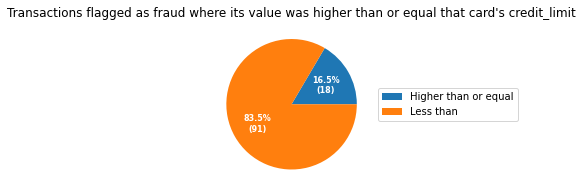

In [11]:
# Plotando um gráfico de setores mostrando os resultados da última célula

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = [higher, df_fraud_transactions['id'].count()-higher]
card_families = ["Higher than or equal", "Less than"]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, card_families,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Transactions flagged as fraud where its value was higher than or equal that card's credit_limit")

plt.show()

In [12]:
customers = np.unique(df_cards_involved_in_fraud['customer_id'])

customer_cards_involved_in_frauds = df_customers.loc[df_customers['id'].isin(customers)]

In [13]:
# média de idade dos customers com cartões envolvidos em fraude (é bem próxima da média de idade do dataset de customers, portanto não diz tanta coisa)
avg_age_frauds = customer_cards_involved_in_frauds['age'].mean()
print("Average age of customers whose cards where involved in fraud: {} years old.".format(round(avg_age_frauds, 2)))

Average age of customers whose cards where involved in fraud: 34.66 years old.


In [14]:
families = np.unique(customer_cards_involved_in_frauds['segment']) 
data = [(seg, customer_cards_involved_in_frauds['segment'].loc[customer_cards_involved_in_frauds['segment'] == seg].count()) for seg in families]
data

[('Diamond', 48), ('Gold', 25), ('Platinum', 24)]

In [15]:
data = zip(*data)
data1 = list(data)
data1

[('Diamond', 'Gold', 'Platinum'), (48, 25, 24)]

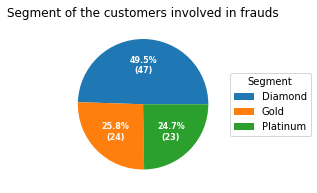

In [16]:
# Plotting a pie plot

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = data1[1]
card_families = data1[0]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, card_families,
          title="Segment",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Segment of the customers involved in frauds")

plt.show()

In [17]:
vg = np.unique(customer_cards_involved_in_frauds['vintage_group']) 
data = [(v, customer_cards_involved_in_frauds['vintage_group'].loc[customer_cards_involved_in_frauds['vintage_group'] == v].count()) for v in vg]
data

[('VG1', 48), ('VG2', 24), ('VG3', 25)]

In [18]:
data = zip(*data)
data1 = list(data)
data1

[('VG1', 'VG2', 'VG3'), (48, 24, 25)]

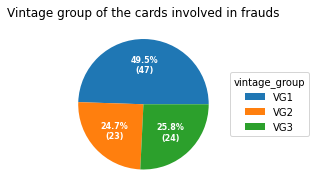

In [19]:
# Plotting a pie plot

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = data1[1]
card_families = data1[0]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, card_families,
          title="vintage_group",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Vintage group of the cards involved in frauds")

plt.show()

Como o dataset de fraudes tinha poucas colunas, decidi marcar as transações fraudulentas com uma flag no próprio DataFrame de transações.

In [20]:
df_transactions['is_fraud'] = [0 for i in range(df_transactions['id'].count())]
df_transactions

,id,card_number,transaction_date,value,segment,is_fraud
0,CTID28830551,1629-9566-3285-2123,2016-04-24,23649,SEG25,0
1,CTID45504917,3697-6001-4909-5350,2016-02-11,26726,SEG16,0
2,CTID47312290,5864-4475-3659-1440,2016-11-01,22012,SEG14,0
3,CTID25637718,5991-4421-8476-3804,2016-01-28,37637,SEG17,0
4,CTID66743960,1893-8853-9900-8478,2016-03-17,5113,SEG14,0
...,...,...,...,...,...,...
9995,CTID25037573,9157-2802-8374-1145,2016-06-10,44280,SEG18,0
9996,CTID43832298,7416-4529-6690-5703,2016-05-23,27163,SEG12,0
9997,CTID56532072,6699-2639-4522-6219,2016-08-06,36424,SEG13,0
9998,CTID88101446,8341-5263-4582-7396,2016-10-10,8464,SEG14,0


In [21]:
frauds = np.array(df_fraud_transactions['id'])
for fraud in frauds:
  df_transactions['is_fraud'].loc[df_transactions['id'] == fraud] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)




---



Tornando variáveis categóricas em variáveis numéricas pois isso facilita muito da análise (correlação, etc).

In [22]:
df_transactions['segment'] = list(map(lambda x: int(x[3:]), list(df_transactions['segment'])))
df_transactions.head()

,id,card_number,transaction_date,value,segment,is_fraud
0,CTID28830551,1629-9566-3285-2123,2016-04-24,23649,25,0
1,CTID45504917,3697-6001-4909-5350,2016-02-11,26726,16,0
2,CTID47312290,5864-4475-3659-1440,2016-11-01,22012,14,0
3,CTID25637718,5991-4421-8476-3804,2016-01-28,37637,17,0
4,CTID66743960,1893-8853-9900-8478,2016-03-17,5113,14,0


In [23]:
import datetime

df_transactions['transaction_date'] = list(
    map(
        lambda x: datetime.datetime(int(x.split('-')[0]), int(x.split('-')[1]), int(x.split('-')[2])), 
        list(df_transactions['transaction_date'])
        )
    )

In [24]:
df_transactions = df_transactions.sort_values(by='transaction_date')

In [25]:
segments = {
    'Diamond': 1,
    'Gold': 2,
    'Platinum': 3
}
df_customers['segment'] = list(map(lambda x: segments[x], list(df_customers['segment'])))
df_customers.head()

,id,age,segment,vintage_group
0,CC25034,35,1,VG1
1,CC59625,22,1,VG1
2,CC69314,33,1,VG1
3,CC67036,46,1,VG1
4,CC25597,44,1,VG1


In [26]:
df_customers['vintage_group'] = list(map(lambda x: int(x[2:]), list(df_customers['vintage_group'])))
df_customers.head()

,id,age,segment,vintage_group
0,CC25034,35,1,1
1,CC59625,22,1,1
2,CC69314,33,1,1
3,CC67036,46,1,1
4,CC25597,44,1,1


In [27]:
df_customers.corr()

,age,segment,vintage_group
age,1.000000,-0.005755,-0.005863
segment,-0.005755,1.000000,0.607736
vintage_group,-0.005863,0.607736,1.000000


In [28]:
card_family = {
    'Premium': 1,
    'Gold': 2,
    'Platinum': 3
}
df_card['card_family'] = list(map(lambda x: card_family[x], list(df_card['card_family'])))

In [29]:
df_card['customer_id'] = list(map(lambda x: int(x[2:]), list(df_card['customer_id'])))

In [30]:
df_customers['id'] = list(map(lambda x: int(x[2:]), list(df_customers['id'])))

In [31]:
df_cards_involved_in_fraud['customer_id'] = list(map(lambda x: int(x[2:]), list(df_cards_involved_in_fraud['customer_id'])))
df_cards_involved_in_fraud.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,card_number,card_family,credit_limit,customer_id
14,7214-4915-6387-5429,Platinum,172000,72302
18,6239-8641-8524-9441,Gold,26000,18438
22,6228-9033-3508-8121,Gold,33000,36771
23,1466-1600-9312-7604,Premium,249000,60926
26,7586-6475-9618-3909,Gold,37000,51908


In [32]:
card_fraud = np.unique(df_cards_involved_in_fraud['card_number'])

df_transactions = df_transactions.sort_values(by='transaction_date')
df_transactions

,id,card_number,transaction_date,value,segment,is_fraud
7976,CTID79649665,2463-9055-1240-3878,2016-01-01,31771,11,0
4807,CTID74037563,6315-7338-3105-9947,2016-01-01,35600,18,0
1876,CTID82497421,1749-4777-2532-7766,2016-01-01,48193,25,0
1561,CTID70644003,9999-3058-2698-4238,2016-01-01,17443,11,0
8726,CTID21418659,9517-7826-1862-6726,2016-01-01,25211,21,0
...,...,...,...,...,...,...
9430,CTID43094492,7658-7645-4568-1461,2016-12-31,5336,15,0
4735,CTID16143048,1438-6906-2509-8219,2016-12-31,41695,14,0
1418,CTID98844242,1749-4777-2532-7766,2016-12-31,15221,23,0
2736,CTID82609500,2517-1247-3682-9050,2016-12-31,16375,11,0


In [33]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 7976 to 156
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                10000 non-null  object        
 1   card_number       10000 non-null  object        
 2   transaction_date  10000 non-null  datetime64[ns]
 3   value             10000 non-null  int64         
 4   segment           10000 non-null  int64         
 5   is_fraud          10000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 546.9+ KB


Desconfio que uma fraude possa se mostrar em valores muito grandes, ou numa frequência alta de transações. Por isso adicionei a coluna week_number, onde adicionei qual semana do ano era aquela quando ocorreu a transação, para poder analisar uma média ou algo assim.

In [34]:
import datetime
df_transactions['week_number'] = [date.strftime('%U') for date in df_transactions['transaction_date']]
df_transactions

,id,card_number,transaction_date,value,segment,is_fraud,week_number
7976,CTID79649665,2463-9055-1240-3878,2016-01-01,31771,11,0,00
4807,CTID74037563,6315-7338-3105-9947,2016-01-01,35600,18,0,00
1876,CTID82497421,1749-4777-2532-7766,2016-01-01,48193,25,0,00
1561,CTID70644003,9999-3058-2698-4238,2016-01-01,17443,11,0,00
8726,CTID21418659,9517-7826-1862-6726,2016-01-01,25211,21,0,00
...,...,...,...,...,...,...,...
9430,CTID43094492,7658-7645-4568-1461,2016-12-31,5336,15,0,52
4735,CTID16143048,1438-6906-2509-8219,2016-12-31,41695,14,0,52
1418,CTID98844242,1749-4777-2532-7766,2016-12-31,15221,23,0,52
2736,CTID82609500,2517-1247-3682-9050,2016-12-31,16375,11,0,52


In [35]:
weeks = np.unique(df_transactions['week_number'])

media = []
for card in card_fraud:
  for week in weeks:
    qty = df_transactions['value'].loc[(df_transactions.card_number == card) & (df_transactions.week_number == week)].count()
    if qty > 0:
      m = round(df_transactions['value'].loc[(df_transactions.card_number == card) & (df_transactions.week_number == week)].sum() / \
      qty, 2)
    else:
      m = 0

    media.append((card, m, week))

Abaixo a semana da fraude está marcada em vermelho.

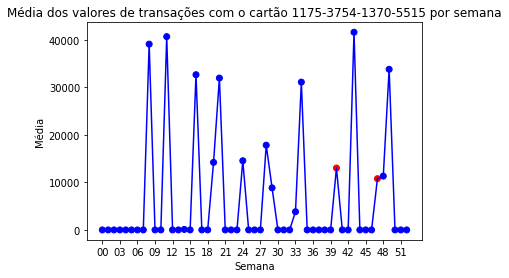

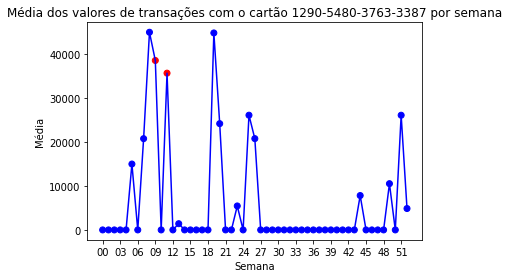

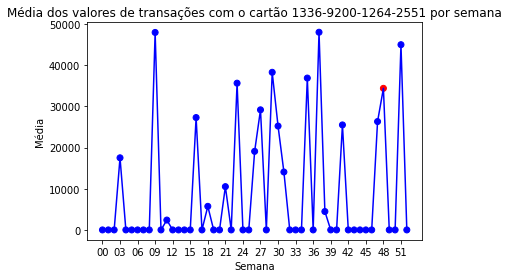

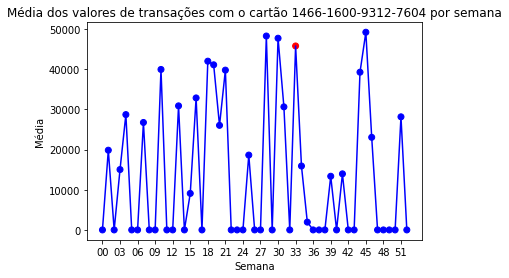

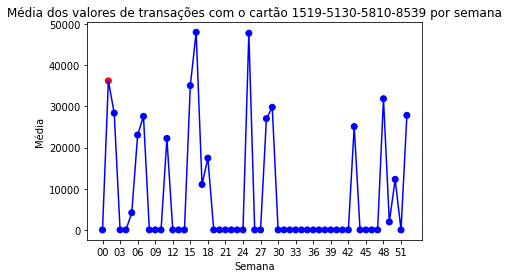

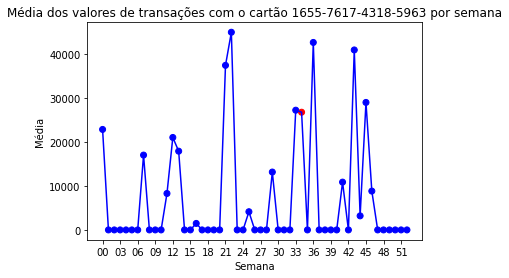

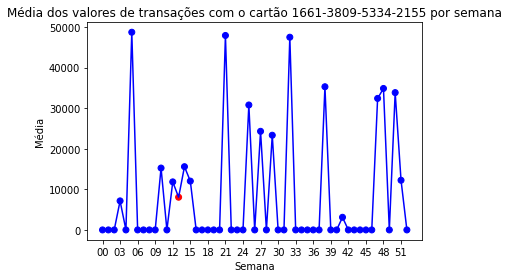

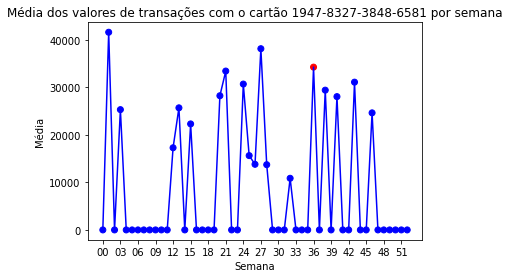

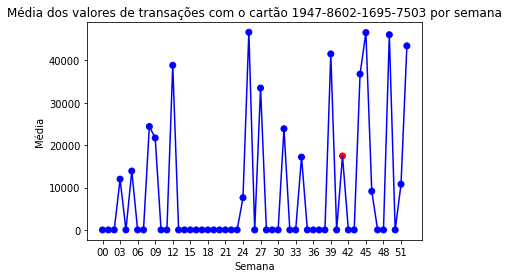

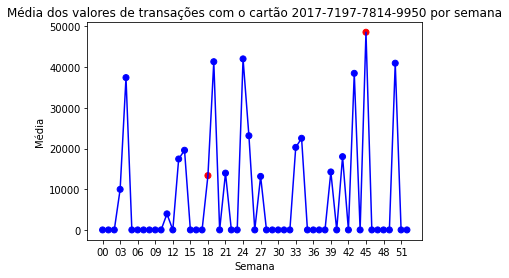

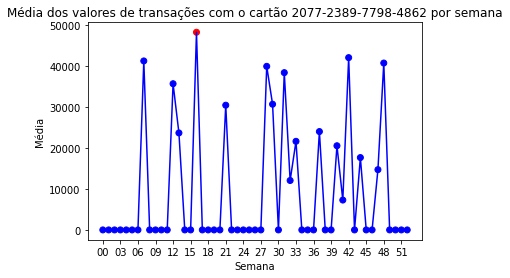

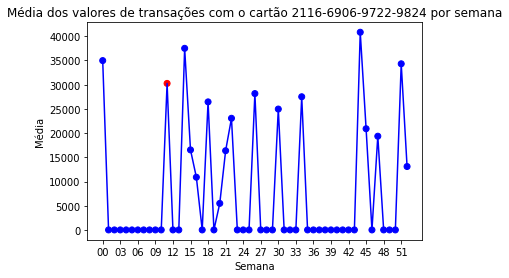

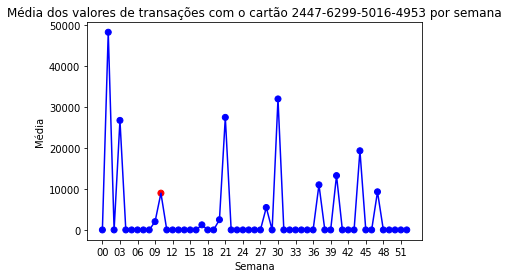

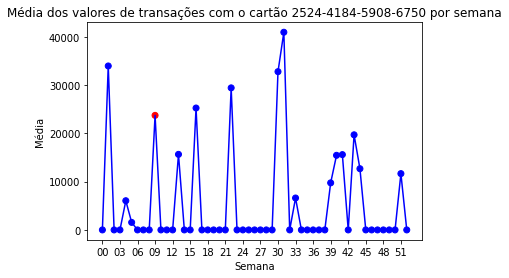

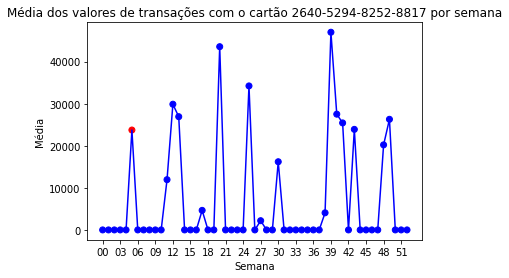

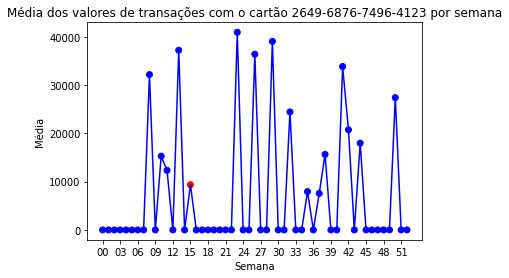

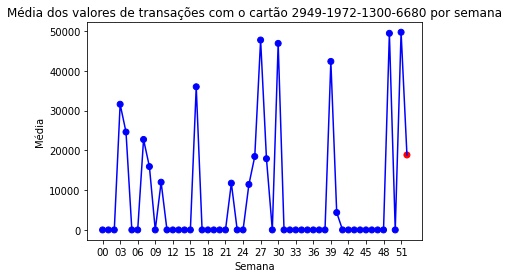

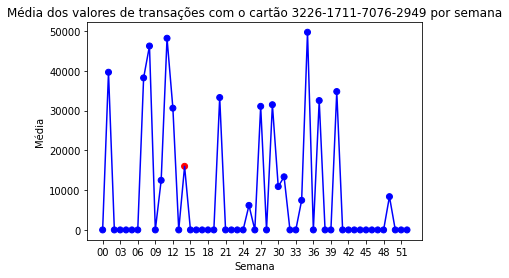

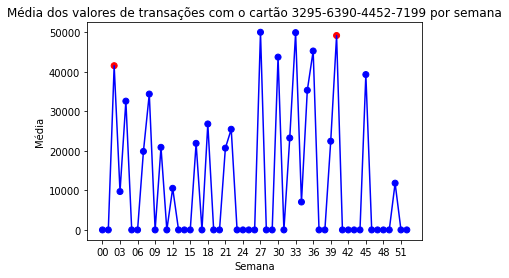

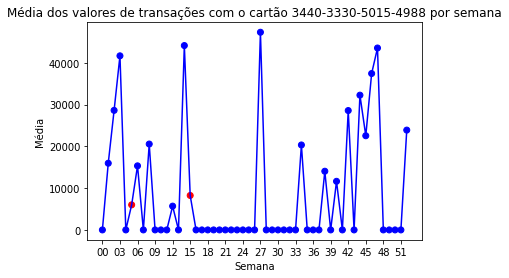

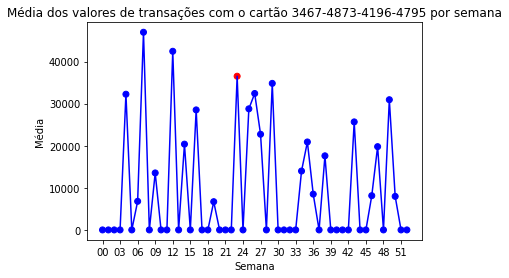

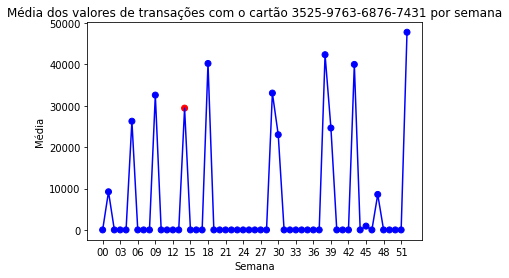

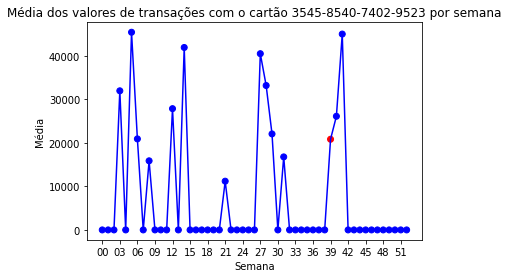

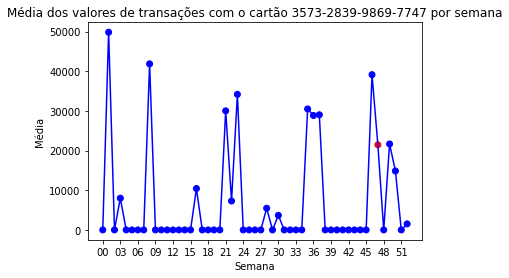

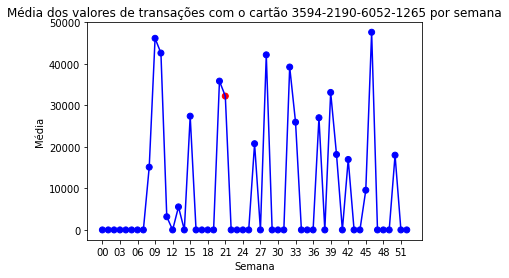

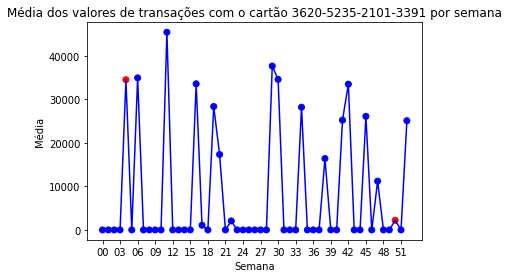

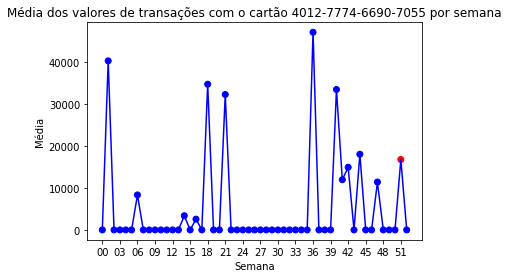

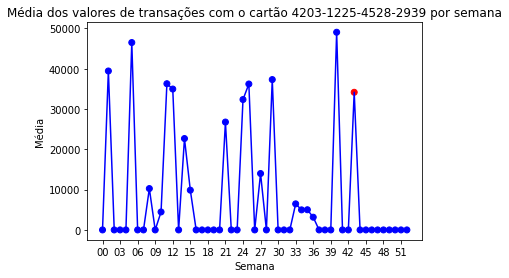

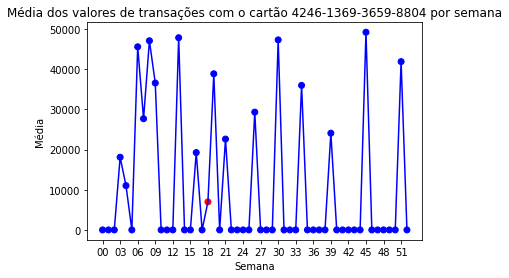

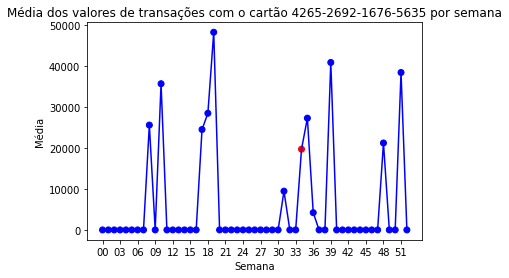

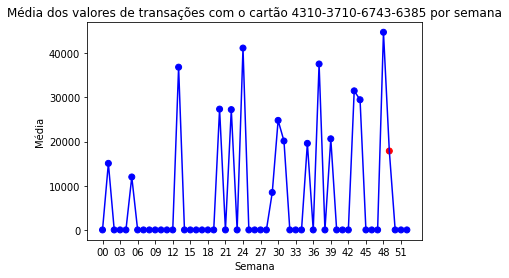

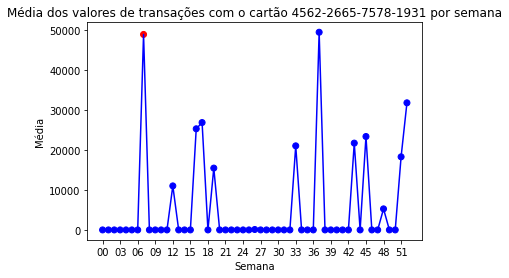

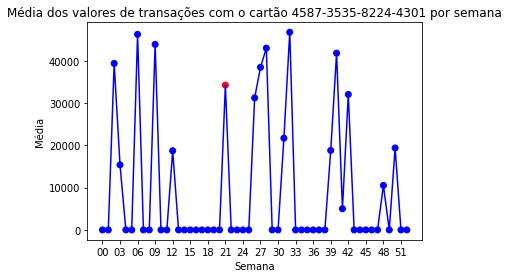

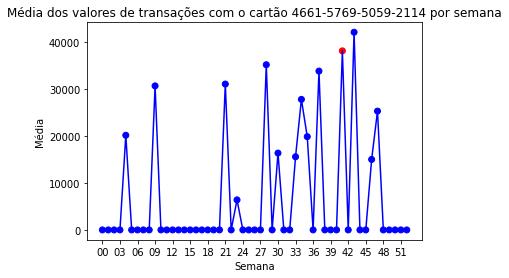

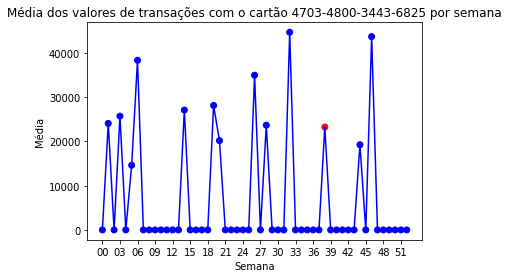

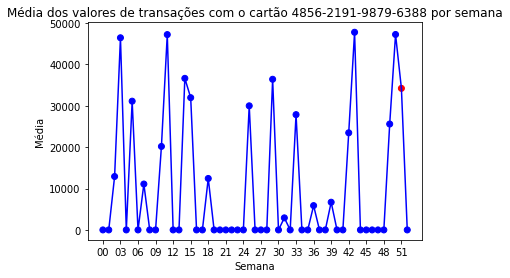

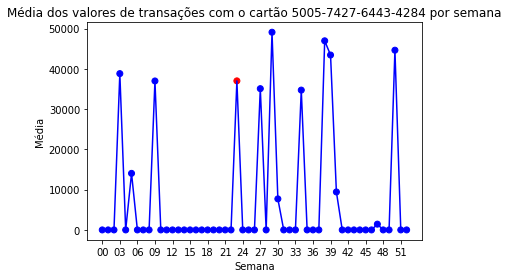

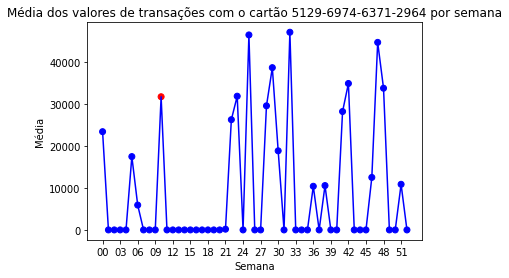

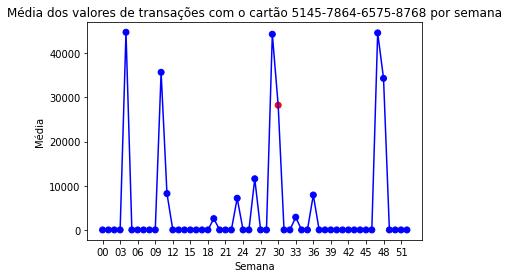

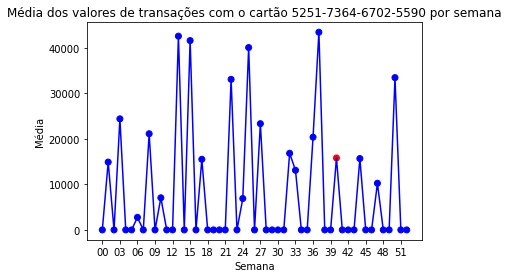

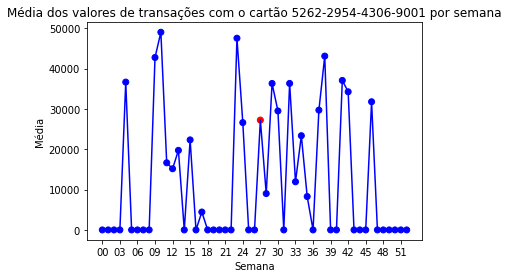

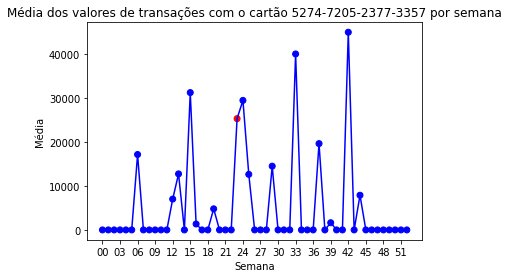

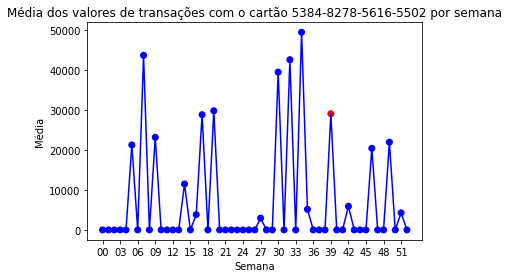

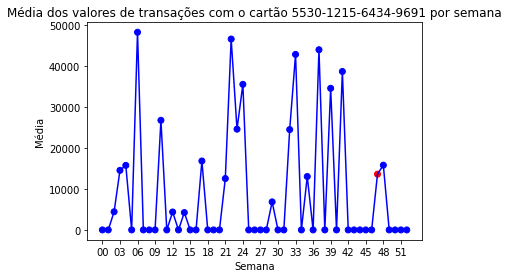

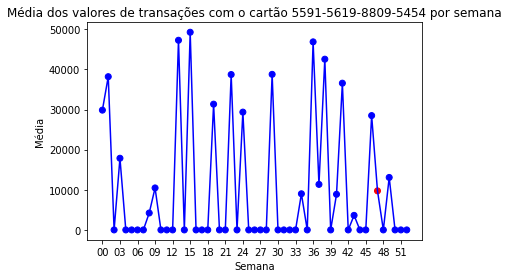

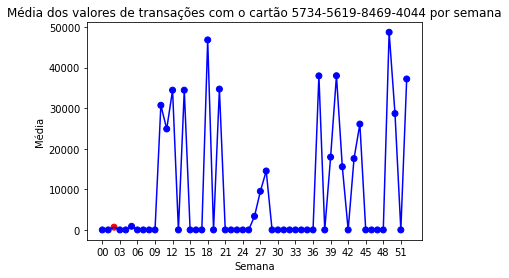

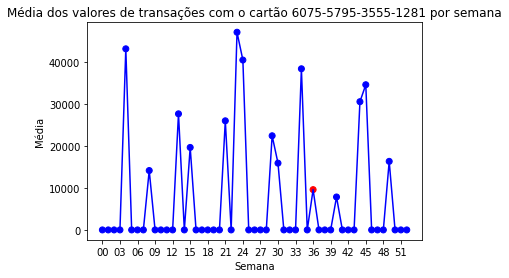

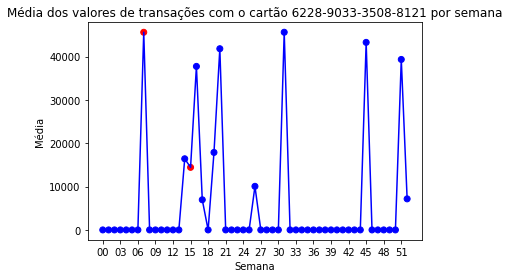

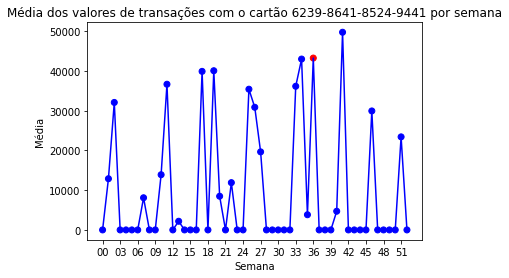

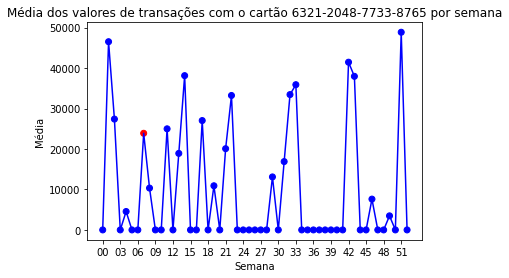

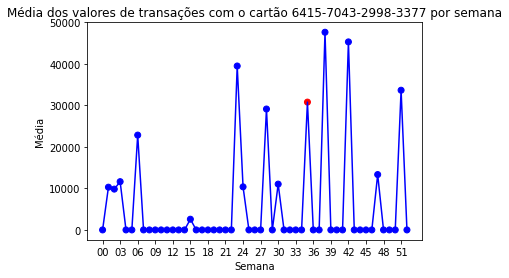

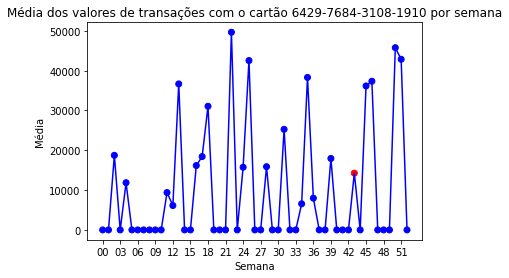

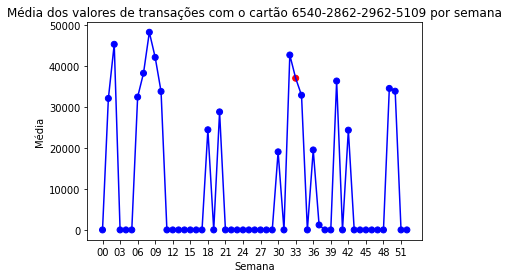

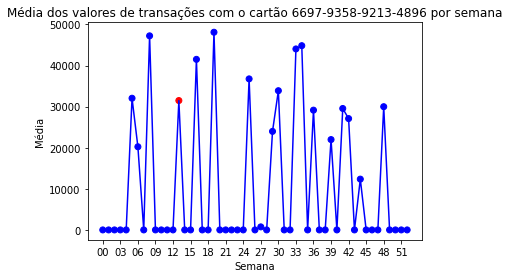

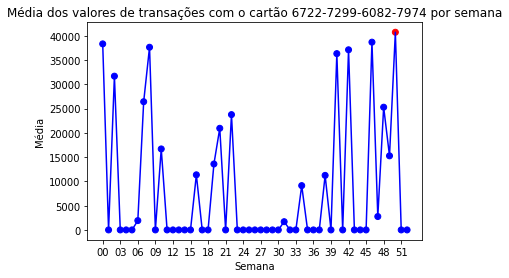

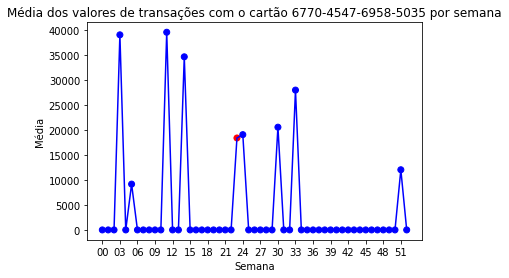

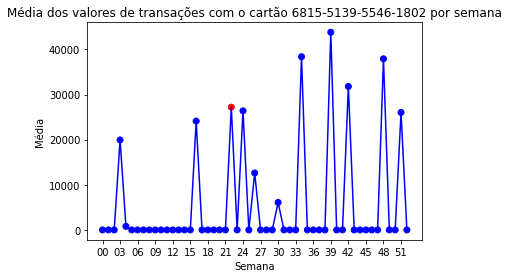

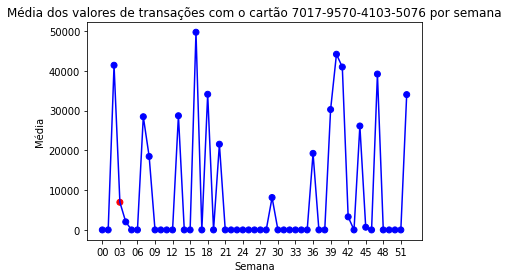

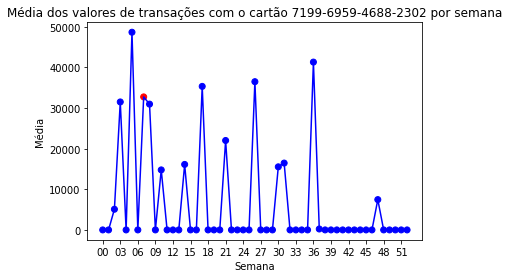

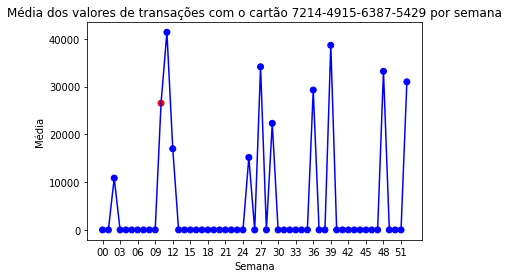

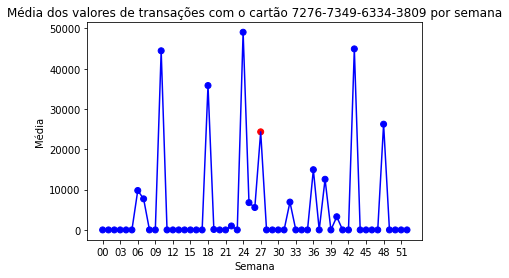

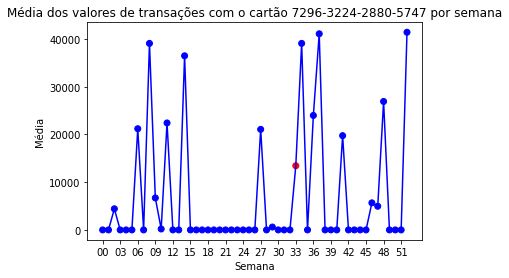

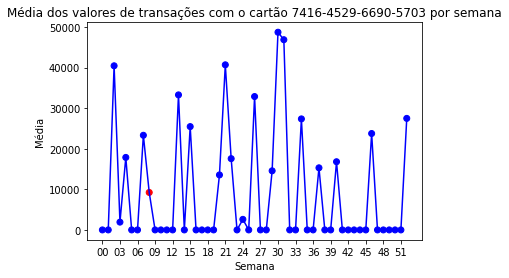

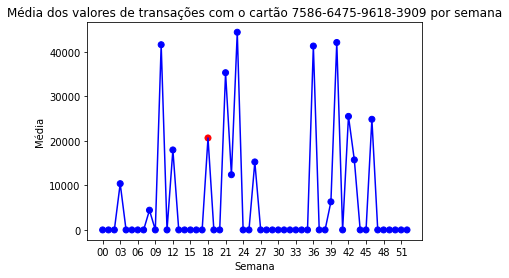

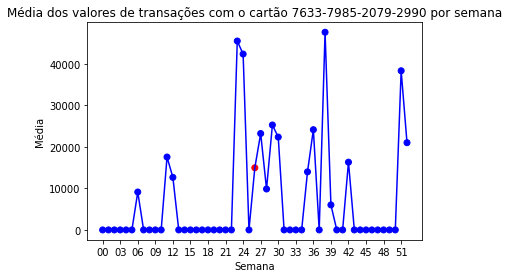

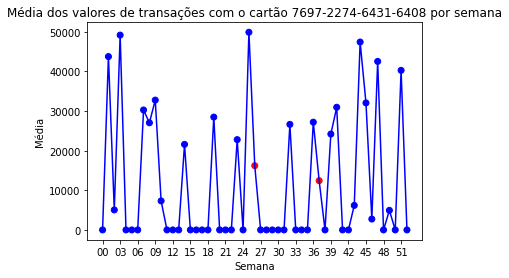

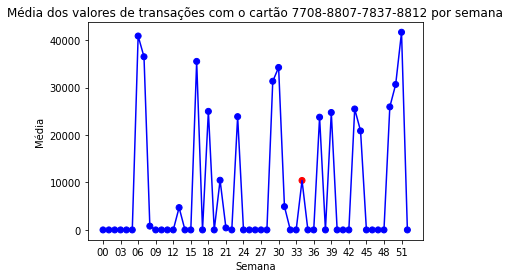

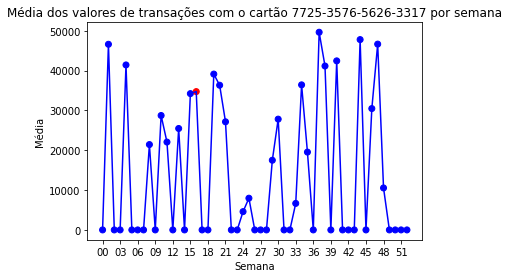

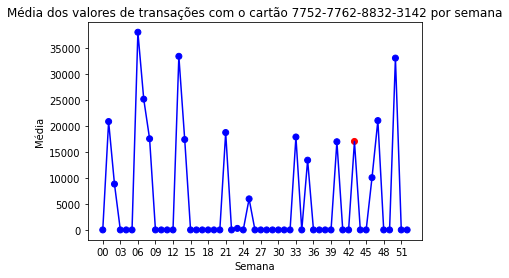

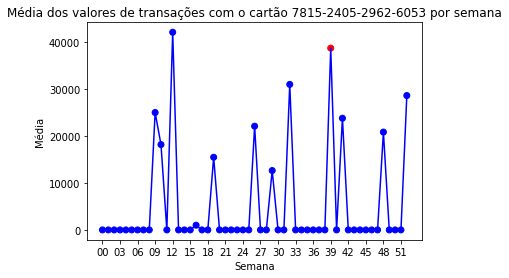

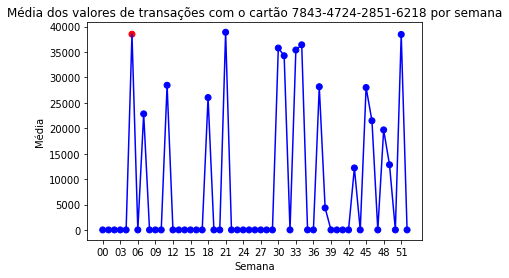

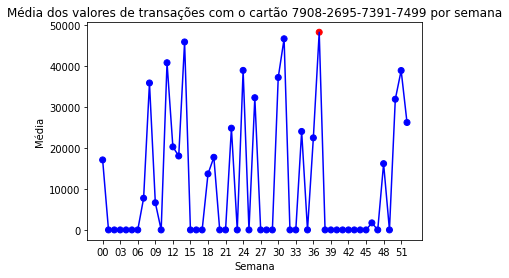

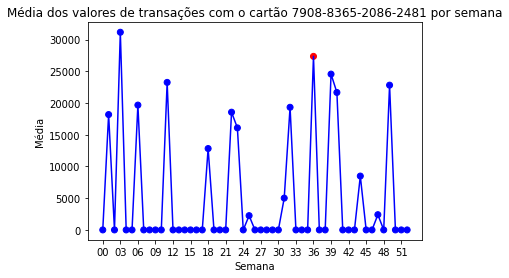

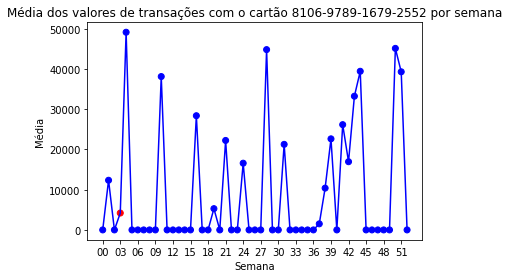

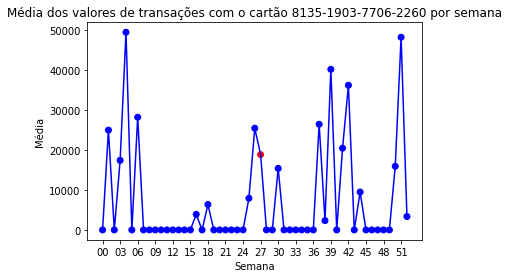

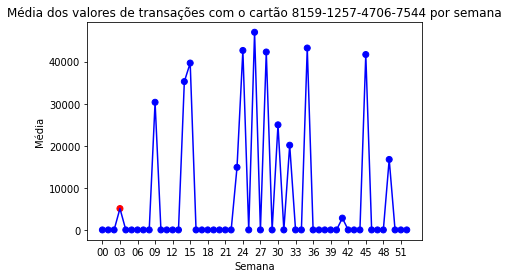

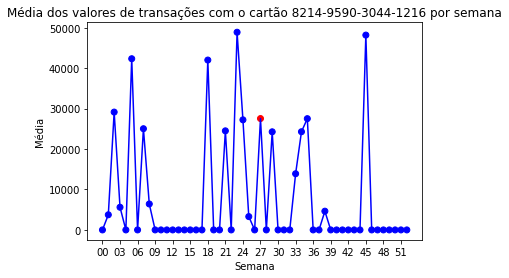

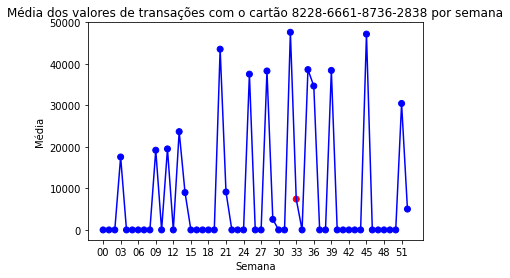

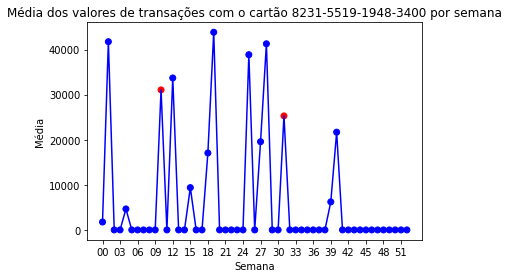

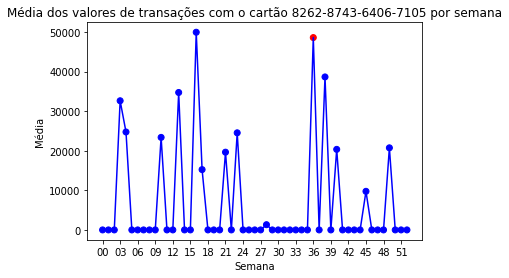

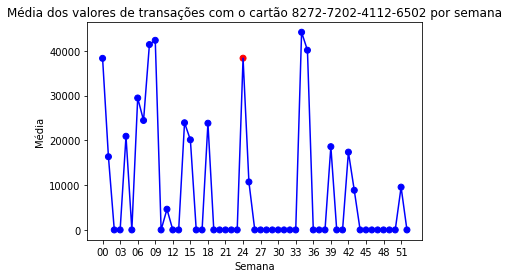

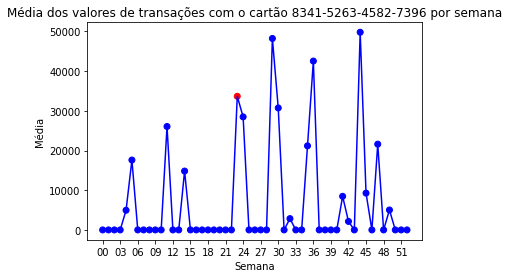

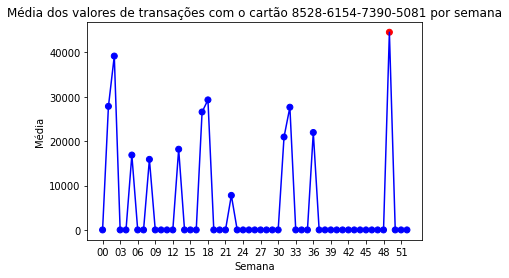

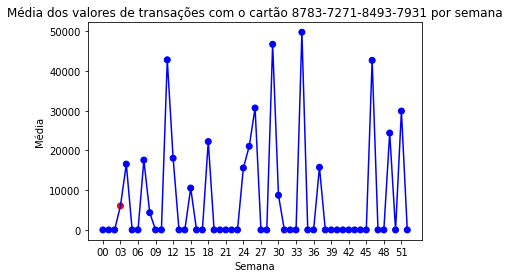

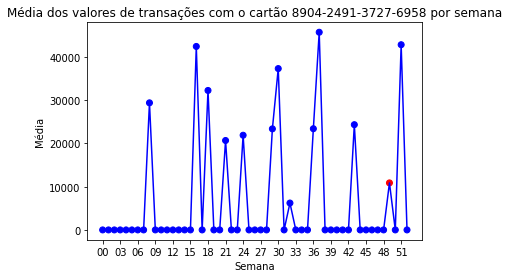

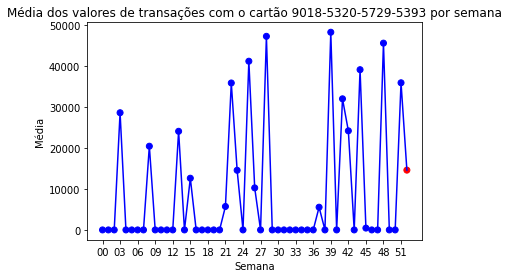

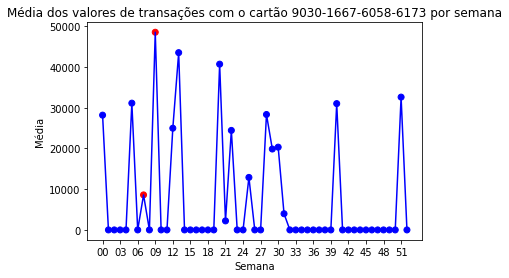

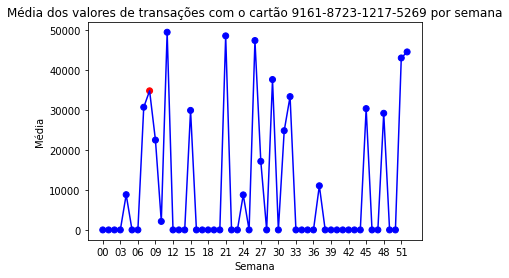

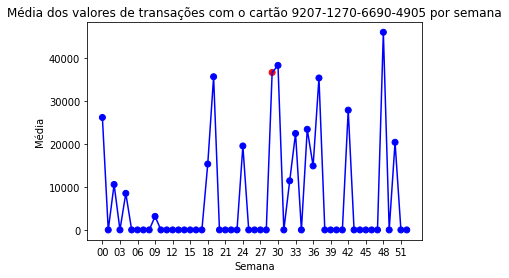

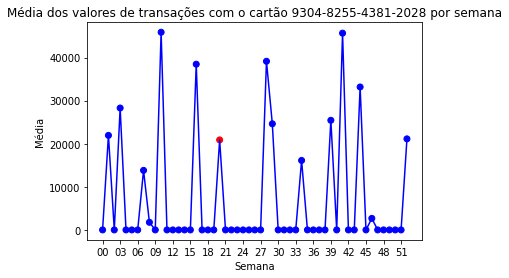

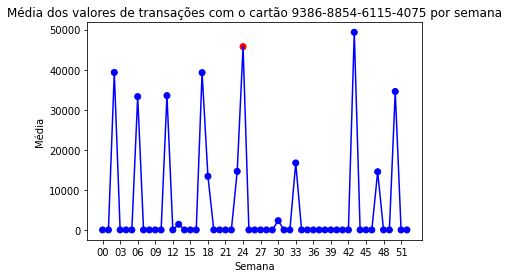

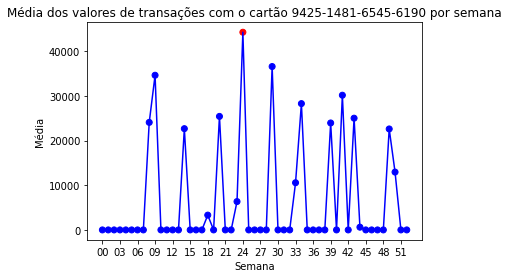

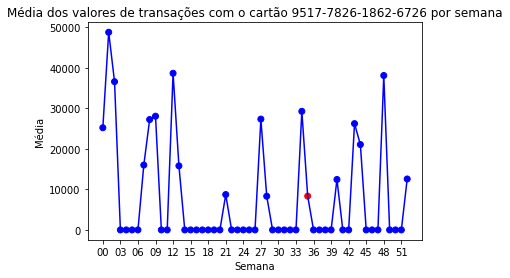

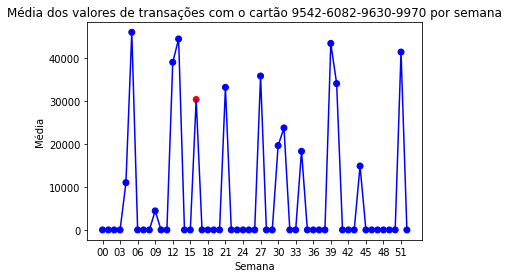

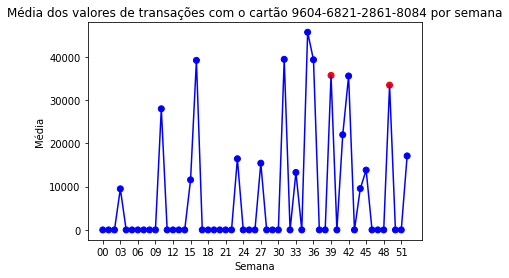

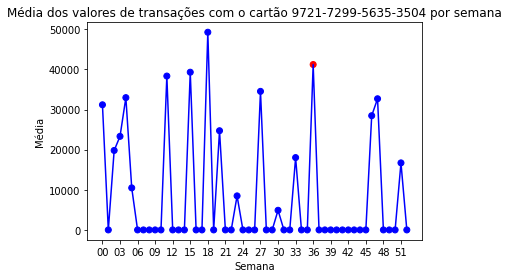

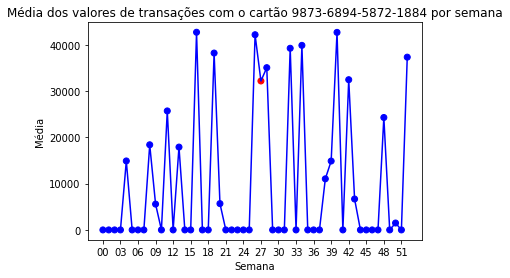

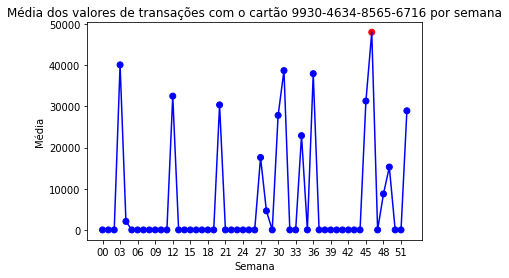

In [36]:
df_means = pd.DataFrame(media, columns=['card_number', 'mean', 'week_number'])

x = np.unique(df_means['week_number'])
for card in np.unique(df_means['card_number']):
  y = df_means['mean'].loc[df_means['card_number'] == card]

  plt.title('Média dos valores de transações com o cartão {} por semana'.format(card))

  weeks = list(map(lambda x: int(x), df_transactions['week_number'].loc[(df_transactions['is_fraud'] == 1) & (df_transactions['card_number'] == card)]))
  colors = []
  for i in range(53):
    if i in weeks:
      colors.append('r')
    else:
      colors.append('b')

  plt.xlabel('Semana')
  plt.ylabel('Média')
  plt.xticks([i for i in range(0, 53, 3)])
  plt.scatter(x, y, c=colors)
  plt.plot(x, y, color='b')
  plt.show()

Os gráficos acima ainda não mostraram uma correlação forte.

Irei checar então a média de valores das transações por mês.